In [162]:
#https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/



import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
import csv

warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline



train  = pd.read_csv('makeinindia_tweets.csv')
#test = pd.read_csv('test_tweets_anuFYb8.csv')


In [163]:


train.head()

,user,id,date,tweets,tidy_tweets,sentiment
0,makeinindia,1.090568e+18,2019-01-30 11:12:17,b'The government has formulated National Polic...,NaN,NaN
1,makeinindia,1.090568e+18,2019-01-30 11:11:42,b'Robust Risk Management System has reduced th...,NaN,NaN
2,makeinindia,1.090568e+18,2019-01-30 11:11:05,b'Doordarshan contributes to the Make-In-India...,NaN,NaN
3,makeinindia,1.090568e+18,2019-01-30 11:09:34,b'The Centre of Excellence on Internet of Thi...,NaN,NaN
4,makeinindia,1.090568e+18,2019-01-30 11:09:08,b'The mining sector witnessed a 337% increase ...,NaN,NaN


In [164]:

#combi = train.append(test, ignore_index=True)


def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    



In [165]:
#train['tidy_tweet'] = np.vectorize(remove_pattern)(train['tidy_tweet'], "@[\w]*")
train["tidy_tweet"] = np.vectorize(remove_pattern)(train["tweets"], "@[\w]*")


train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [167]:
#####not working code....
#with open ('makeinindia_tweets(1).csv' , 'a') as f:
 #   writer = csv.writer(f, train['tidy_tweets'])
  #  for row in tidy_tweet:
   #     writer.writerow(train['tidy_tweets'])
#f.close()

In [168]:
train.head()


,user,id,date,tweets,tidy_tweets,sentiment,tidy_tweet
0,makeinindia,1.090568e+18,2019-01-30 11:12:17,b'The government has formulated National Polic...,NaN,NaN,government formulated National Policy Electron...
1,makeinindia,1.090568e+18,2019-01-30 11:11:42,b'Robust Risk Management System has reduced th...,NaN,NaN,Robust Risk Management System reduced rate phy...
2,makeinindia,1.090568e+18,2019-01-30 11:11:05,b'Doordarshan contributes to the Make-In-India...,NaN,NaN,Doordarshan contributes Make India initiative ...
3,makeinindia,1.090568e+18,2019-01-30 11:09:34,b'The Centre of Excellence on Internet of Thi...,NaN,NaN,Centre Excellence Internet Things been jointly...
4,makeinindia,1.090568e+18,2019-01-30 11:09:08,b'The mining sector witnessed a 337% increase ...,NaN,NaN,mining sector witnessed increase equity inflow...


In [182]:
import csv
from textblob import TextBlob

infile = 'makeinindia_tweets.csv'

with open(infile, 'r') as csvfile:
    rows = csv.reader(csvfile)
    for row in train['tidy_tweet']:
        sentence = row
        blob = TextBlob(sentence)
        print (sentence)
        if(blob.sentiment.polarity > 0):
            print("positive")
        elif(blob.sentiment.polarity < 0):
            print("negative")
        else:
            print("Neutral")
    
    
    
    

government formulated National Policy Electronics with vision increasing exports Electroni https AemjC
Neutral
Robust Risk Management System reduced rate physical inspections import consignments thereby streamlin https WphlmFwct
Neutral
Doordarshan contributes Make India initiative adopting iCAS FREE DISH platform https
positive
Centre Excellence Internet Things been jointly Public Private Partnership https gbyBhbVgSM
Neutral
mining sector witnessed increase equity inflows from during billi https MHKKwIcXxO
Neutral
Contract construction ships signed with scheduled delivery Inter Govt
Neutral
States Startup Ranking exercise great success created healthy competition among States learn exchange
positive
boost industrialisation DIPP disbursed crores under Transport Subsidy Scheme Freight Subsidy Scheme
Neutral
DIPP disbursed crores under Capital Investment Subsidy NEIIPP scheme benefits Industrial units
Neutral
support industrialisation DIPP disbursed crores under Transport Subsidy Scheme 

Reforms Resolving Insolvency such time bound organisation procedure facilitated continuation https GdKWcsi
Neutral
Incubated startups have filed twelve patents under Centre Excellence Internet Things https SmDDLMv
Neutral
order facilitate support create awareness among innovators MeitY launched Support https DYKFV
Neutral
MeitY approved schemes Skill Development ESDM Sector Scheme Financial Assistance select https ORhTxrnUt
Neutral
government provides cost infrastructure Grant Brownfield Electronics Manufacturing Cluster https DPykxwd
Neutral
India meets current demand electronic products imports which presents golden opportunity https GSoEK
positive
Mobile manufacturing shines India houses mobile ancillary manufacturing units provides employment https GMgffPzhU
Neutral
Centre Excellence Internet Things been jointly Public Private Partnership https jEhLYDkhFY
Neutral
automobile
Neutral
increase equity inflows Renewable sector from billion received during https IFRnj
Neutral
With coastl

positive
further added that with fast paced digital economy rise today digitally empowered India mission
positive
Prasad Chief Staff giving vote thanks DIPP WIPO GDCM conference particularly thanked
positive
Francis Gurry WIPO further added that past years have seen profound change landscape notably crea
positive
Francis Gurry said that digital community needs also address fundamental questions relating distribution
Neutral
While addressing governance issues affecting digital economy creative industries Francis Gurry stressed
positive


In [183]:
train.head()

,user,id,date,tweets,tidy_tweets,sentiment,tidy_tweet
0,makeinindia,1.090568e+18,2019-01-30 11:12:17,b'The government has formulated National Polic...,NaN,NaN,government formulated National Policy Electron...
1,makeinindia,1.090568e+18,2019-01-30 11:11:42,b'Robust Risk Management System has reduced th...,NaN,NaN,Robust Risk Management System reduced rate phy...
2,makeinindia,1.090568e+18,2019-01-30 11:11:05,b'Doordarshan contributes to the Make-In-India...,NaN,NaN,Doordarshan contributes Make India initiative ...
3,makeinindia,1.090568e+18,2019-01-30 11:09:34,b'The Centre of Excellence on Internet of Thi...,NaN,NaN,Centre Excellence Internet Things been jointly...
4,makeinindia,1.090568e+18,2019-01-30 11:09:08,b'The mining sector witnessed a 337% increase ...,NaN,NaN,mining sector witnessed increase equity inflow...


In [38]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


KeyError: 'tidy_tweet'

In [39]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()


NameError: name 'tokenized_tweet' is not defined

In [112]:

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

train['tidy_tweet'] = tokenized_tweet

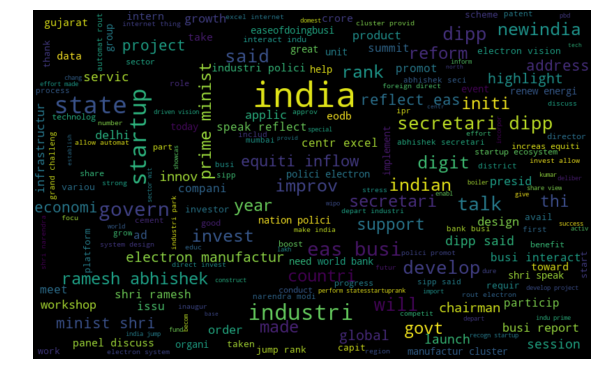

In [113]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud


all_words = ' '.join([tweet for tweet in train['tidy_tweet']])
#print (all_words)

# 
wordcloud = WordCloud(width=800, height=500, max_font_size=50).generate(all_words)


# 
plt.figure(figsize=(10, 7))
# 
plt.imshow(wordcloud, interpolation="bilinear")
# 
plt.axis('off')
# 
plt.show()


